In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [4]:
X_train.shape #60000 images and 28*28 pixel

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0] #checking individual image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

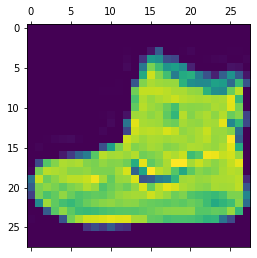

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0] #level corresponds to this data.. which is 9...number 9 is ankle boot

9

In [9]:
#normalizing before training neural network...all the values will be 0/1
X_train = X_train/255
X_test = X_test/255


In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [12]:
model = Sequential() #building neural network  model

In [13]:
model.add(Flatten(input_shape=[28, 28]))#one input layer ,shape (28,28) bcz image size ,flatten bcz converting 2d to 1d array
model.add(Dense(100, activation="relu"))#2nd layer(hidden layer)  ,100 of neurons in in this layer
model.add(Dense(10, activation="softmax"))#output layer has ten neurons bcz output is 10 objects/labels
#so builded a neural net with 3 layer


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])
#now model is ready for training

In [16]:
#training the network
model.fit(X_train, y_train)

Epoch 1/1
60000/60000 [==============================] - 10s 161us/step - loss: 0.5004 - accuracy: 0.8252


In [17]:
model.fit(X_train, y_train,epochs=5) #5 iterations
#now neural network is ready for prediction

Epoch 1/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.3776 - accuracy: 0.8640
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3381 - accuracy: 0.8766
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3149 - accuracy: 0.8850
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2975 - accuracy: 0.8910
Epoch 5/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.2830 - accuracy: 0.8959


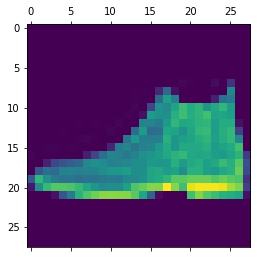

In [18]:
plt.matshow(X_test[0])

In [19]:
yp = model.predict(X_test) #x test er data gular jnno predict korbo

In [20]:
yp[0] #here in output the softmax funtion gave 10 probabilities for 10 objects 
       #no:8 has highest probability and this is ankle boot

array([2.0506195e-07, 2.9859176e-10, 2.7283443e-07, 6.5499115e-08,
       5.4812385e-06, 3.0431211e-02, 1.2034903e-05, 8.3678171e-02,
       9.6925999e-07, 8.8587159e-01], dtype=float32)

In [21]:
np.argmax(yp[0]) #tells which index is highest

9

In [22]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [23]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

In [24]:
#checking accuracy
model.evaluate(X_test, y_test)  #in out put the secon parameter is the accuracy score & first parameter is loss
#then changing the no of neuron we can check the accuracy

10000/10000 [==============================] - 0s 47us/step


[0.37698529133796693, 0.8622000217437744]